<a href="https://colab.research.google.com/github/PrashAI/myprojectr/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = np.random.uniform(0,1,100)
Y = np.random.uniform(0,1,100)
X

array([0.26958568, 0.86357988, 0.37543302, 0.32523089, 0.93853343,
       0.02792269, 0.16815561, 0.56661253, 0.10118641, 0.64180721,
       0.04591066, 0.46765762, 0.5234437 , 0.39657806, 0.43177842,
       0.09404828, 0.99798763, 0.26288791, 0.68053537, 0.99695447,
       0.33305951, 0.8761792 , 0.01162977, 0.78198843, 0.09210143,
       0.04373251, 0.66988325, 0.20974152, 0.02213102, 0.43329744,
       0.1408239 , 0.42070168, 0.31586053, 0.31580704, 0.47355334,
       0.26079208, 0.72945123, 0.73931267, 0.0270931 , 0.10179901,
       0.84398472, 0.66554855, 0.9012783 , 0.64925245, 0.94910156,
       0.84184293, 0.48656173, 0.55270221, 0.6073887 , 0.55802275,
       0.57380954, 0.67195757, 0.69537403, 0.48204642, 0.70066605,
       0.62166965, 0.387144  , 0.69880163, 0.11127138, 0.83851035,
       0.06312618, 0.72776062, 0.50257228, 0.91731788, 0.82835229,
       0.19503923, 0.34689582, 0.48089359, 0.54469961, 0.9860272 ,
       0.17625373, 0.0806838 , 0.61278903, 0.85405615, 0.74087

In [4]:
df_xy = pd.DataFrame(columns=['X','Y'])
df_xy.X = X
df_xy.Y = Y
df_xy


,X,Y
0,0.269586,0.435372
1,0.863580,0.064248
2,0.375433,0.078392
3,0.325231,0.577925
4,0.938533,0.223558
...,...,...
95,0.029067,0.977698
96,0.851068,0.193232
97,0.587567,0.443424
98,0.757011,0.047409


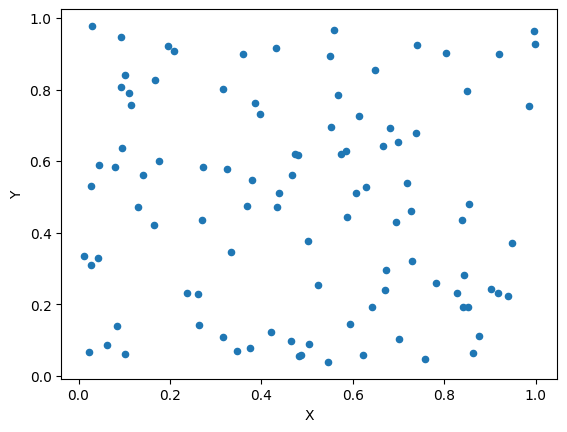

In [9]:
df_xy.plot(x='X', y='Y', kind='scatter')
model1 = KMeans(n_clusters=5).fit(df_xy)


K-Means Clustering

<Axes: xlabel='X', ylabel='Y'>

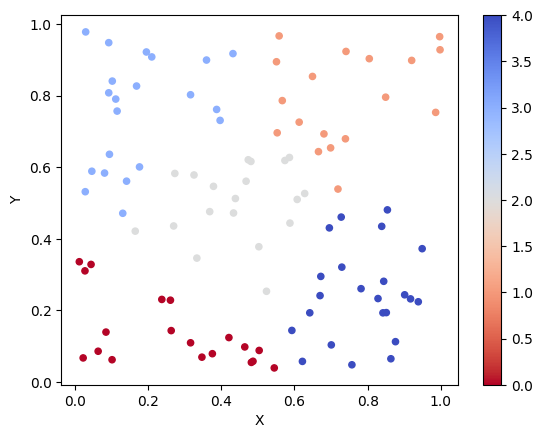

In [13]:
df_xy.plot(x='X', y='Y', c=model1.labels_, kind='scatter', cmap=plt.cm.coolwarm_r)

In [14]:
Univ = pd.read_csv('/content/Universities.csv')
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [15]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


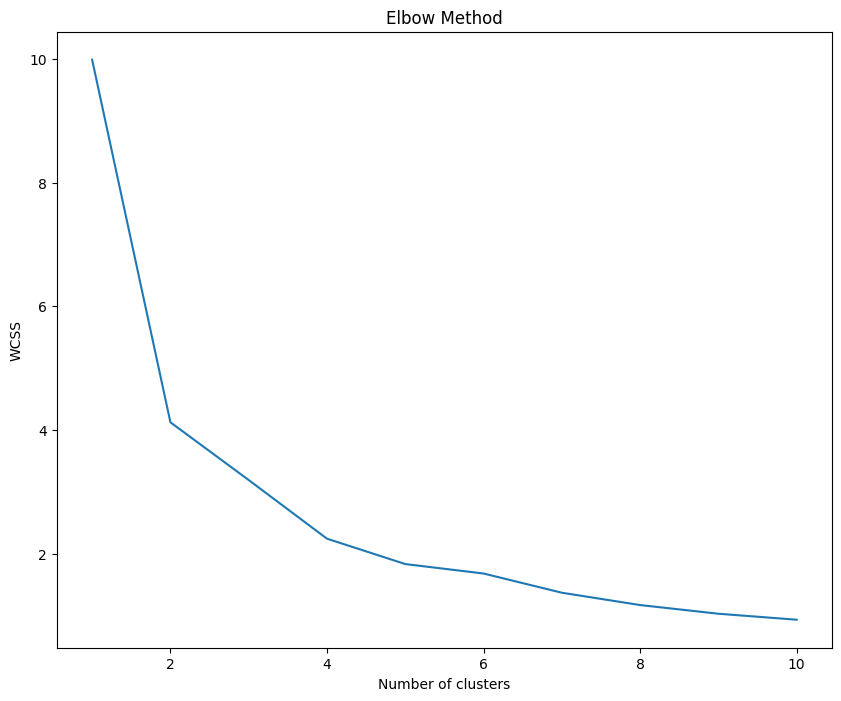

In [23]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10,8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit_predict(df_norm)

array([2, 0, 3, 2, 2, 4, 4, 2, 4, 0, 4, 2, 2, 1, 4, 1, 4, 1, 3, 2, 3, 2,
       2, 1, 4], dtype=int32)

In [26]:
clusters_new.labels_

array([2, 0, 3, 2, 2, 4, 4, 2, 4, 0, 4, 2, 2, 1, 4, 1, 4, 1, 3, 2, 3, 2,
       2, 1, 4], dtype=int32)

In [27]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [28]:
#these are standardized values.
clusters_new.cluster_centers_

array([[0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333],
       [0.65718157, 0.72222222, 0.2748538 , 0.33918129, 0.28414929,
        0.78888889],
       [0.54065041, 0.63888889, 0.54824561, 0.42105263, 0.179354  ,
        0.37777778],
       [0.87456446, 0.88095238, 0.09774436, 0.2406015 , 0.48789238,
        0.91904762]])

In [31]:
New_Univ = pd.Series(Univ.clusterid_new)
Univ['clusterid_new'] = New_Univ
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [32]:
Univ.iloc[:,1:7].groupby(Univ.clusterid_new).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusterid_new,,,,,,
0,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
3,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
4,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


<Axes: xlabel='Top10', ylabel='SAT'>

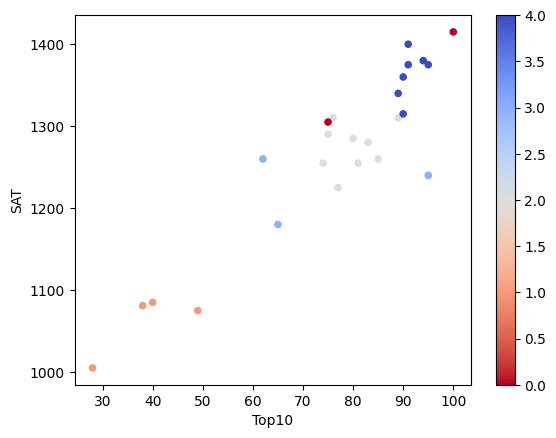

In [34]:
Univ.plot(x="Top10",y='SAT',c=New_Univ, kind= 'scatter', cmap=plt.cm.coolwarm_r)